Reproduction of the article Explaining A Black-box By Using A Deep Variational Information Bottleneck Approach


## Training a simple mnist model

In [2]:
# Train the mnist base model
!optirun python train_mnist.py

/home/maxime/.local/lib/python3.8/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/lib/python3.8/site-packages/tensorflow/python/pywrap_tensorflow_internal.py:15: DeprecationWarning:

the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses

<frozen importlib._bootstrap>:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

<frozen importlib._bootstrap>:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

1/5 * Epoch (train): 100% 235/235 [00:10<00:00, 23.31it/s, _timer/_fps=14492.008, _timer/batch_time=0.018, _timer/data_time=0.016, _timer/model_time=0.001, accuracy01=0.854, loss=0.471]
1/5 * Epoch (valid): 100% 40/40 [00:01<00:00, 24.92it/s, _timer/_fps=48946.612, _timer/b

In [3]:
# Train the explainer model
!optirun python train_explain.py

tensor(0.1445, device='cuda:0')
tensor(2.3239, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1328, device='cuda:0')
tensor(2.3023, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1602, device='cuda:0')
tensor(2.2746, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1523, device='cuda:0')
tensor(2.2617, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1328, device='cuda:0')
tensor(2.3324, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1641, device='cuda:0')
tensor(2.2858, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1875, device='cuda:0')
tensor(2.3168, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1562, device='cuda:0')
tensor(2.2516, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1445, device='cuda:0')
tensor(2.2861, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1641, device='cuda:0')
tensor(2.2401, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1289, device='cuda:0')
tensor(2.3152, device='cuda:0', grad_fn=<NllLossBackward>)

Now that we trained the explainer, we can do some visualization with it


In [19]:
# some useful imports

import torch
import torchvision
from models.cnn import mnistConv
from filter import denseExplainer, convExplainer
from models.explainer import ExplainerMnist
from matplotlib import pyplot as plt
import numpy as np
from torch.optim import Adam

In [6]:
# We load the data sets
mnist_data = torchvision.datasets.MNIST('files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

# We build the model
model = mnistConv('cpu')
explainer = ExplainerMnist('cpu')

# And we load the weights got from previous training
model.load_state_dict(torch.load("logdir/mnist/checkpoints/best.pth", map_location=torch.device('cpu'))['model_state_dict'])

explainer.load_state_dict(torch.load('explainer.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

## Some examples with 20 lightend pixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<ipython-input-20-4554ae2457e0>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for

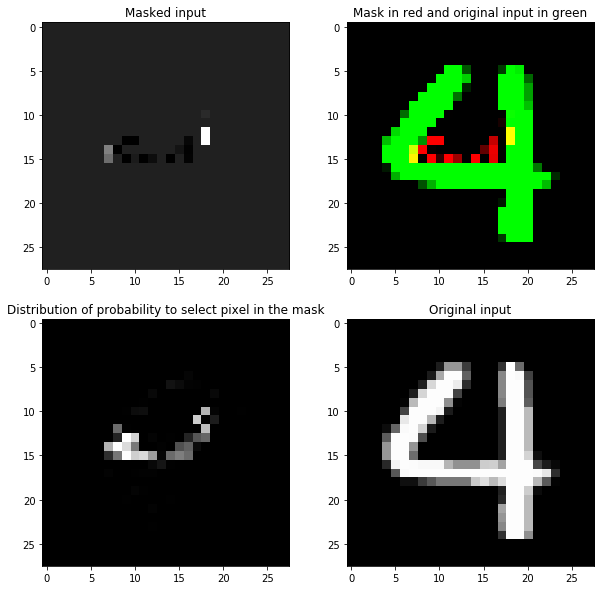

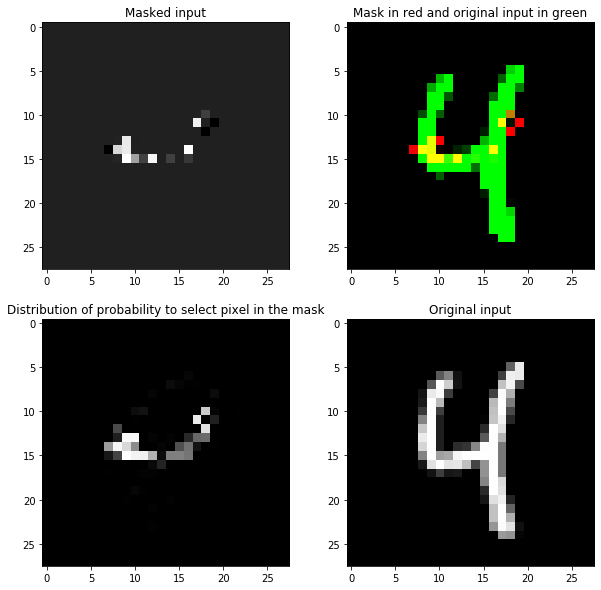

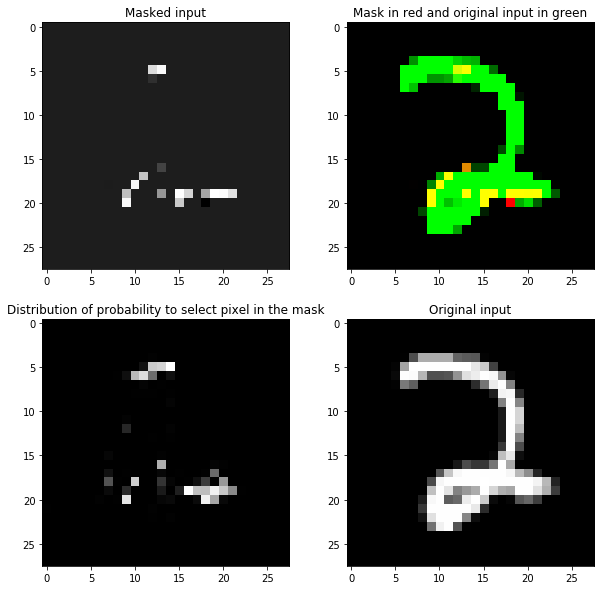

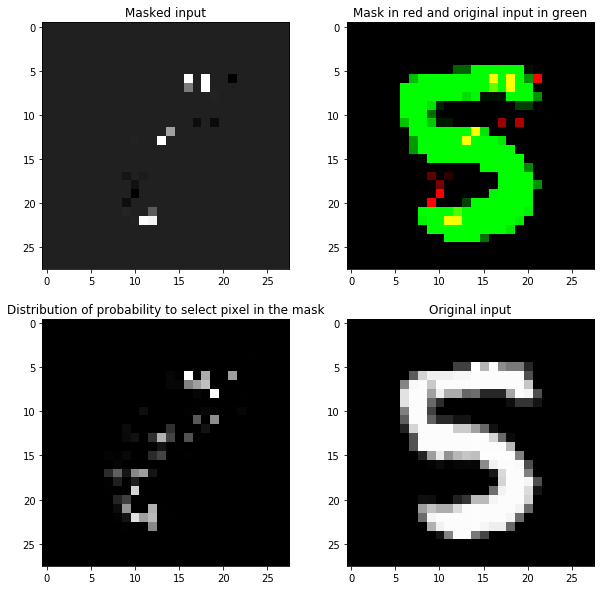

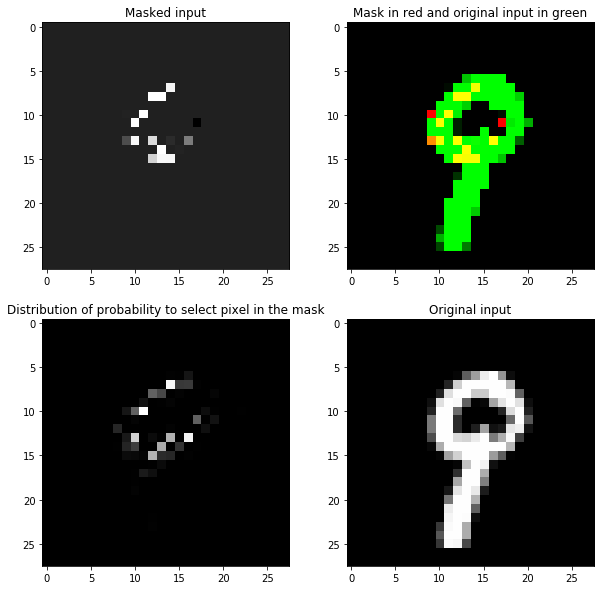

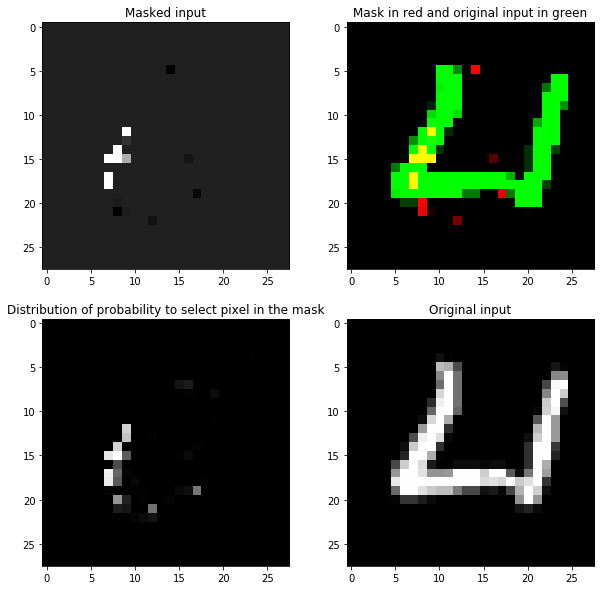

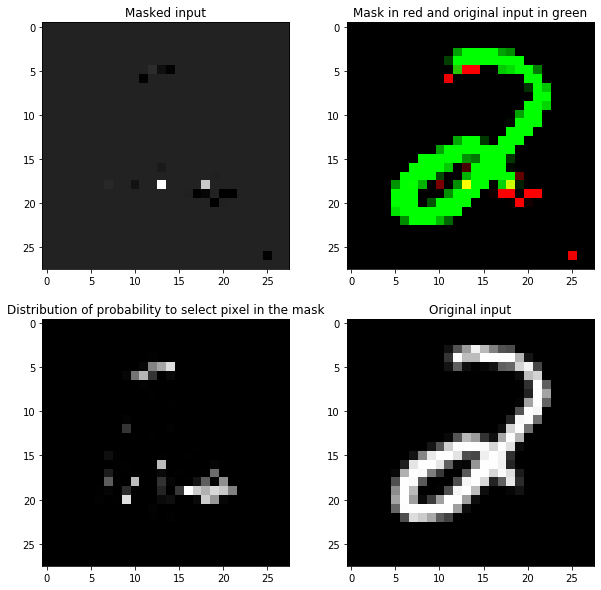

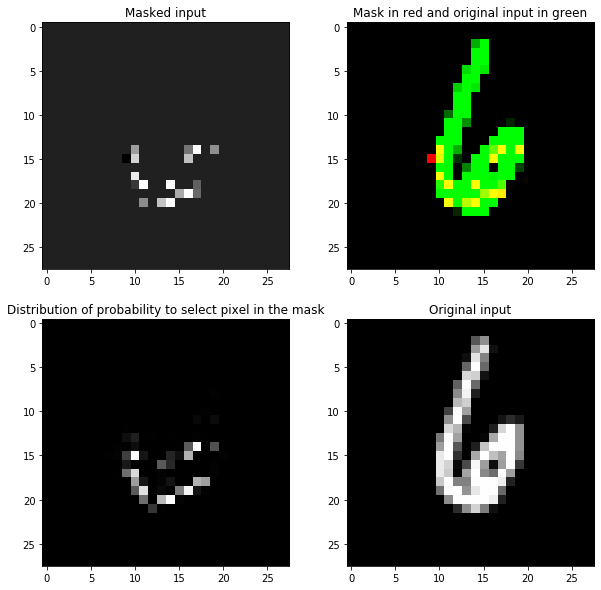

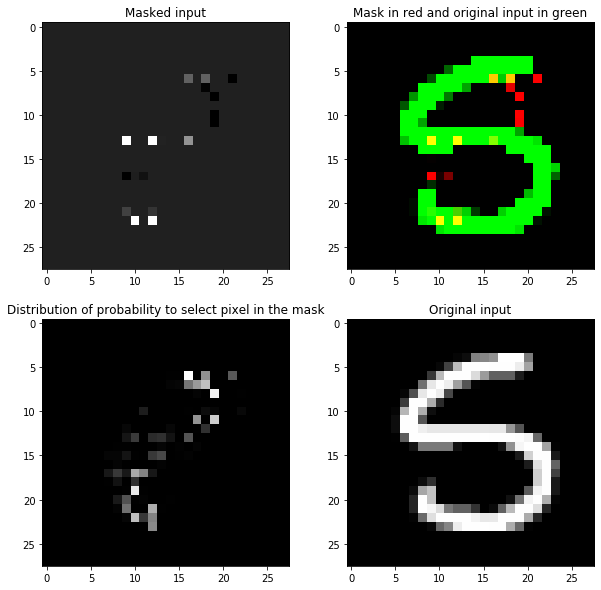

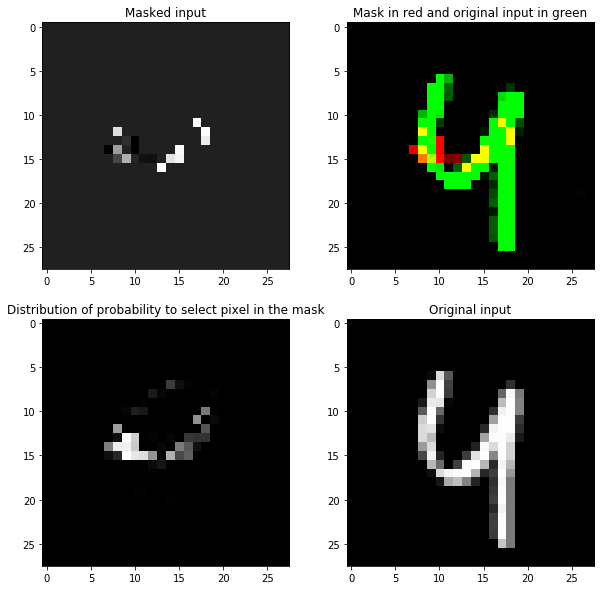

In [20]:
for _ in range(10):
    x = torch.unsqueeze(mnist_data[np.random.randint(0, 2000)][0],0).to('cpu')
    mask, proba = explainer.make_mask(x, k=20)
    mask = mask.view((28,28))
    xchap = x * mask
    
    maskx = torch.stack([mask, x.squeeze(), torch.zeros_like(mask)], dim=-1)
    maskx = maskx.cpu().detach().numpy()
    
    xchap = torch.squeeze(xchap).cpu().detach().numpy()
    mask = torch.squeeze(mask).cpu().detach().numpy()
    
    proba_numpy = proba.view((28,28)).cpu().detach().numpy()
    
    f, axes = plt.subplots(2,2, figsize=(10,10))
    
    axes[0,0].imshow(xchap, cmap='gray')
    axes[0,0].set_title("Masked input")
    
    axes[0,1].imshow(maskx)
    axes[0,1].set_title("Mask in red and original input in green")
    
    
    axes[1,0].imshow(proba_numpy, cmap='gray')
    axes[1,0].set_title("Distribution of probability to select pixel in the mask")
    
    
    axes[1,1].imshow(torch.squeeze(x).cpu().detach().numpy(), cmap='gray')
    axes[1,1].set_title("Original input")
    
    fig.show()